# Import librairies

In [20]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
# pour la matrice de v de cramer
from scipy.stats import chi2_contingency

# Import data

In [12]:
chemin = os.path.join('..', 'data', 'data.csv')
df = pd.read_csv(chemin)

In [13]:
df.shape

(7043, 21)

In [14]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
df.dtypes.to_list

<bound method IndexOpsMixin.tolist of customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object>

# Analyse univariée

In [16]:
# Fonction qui renvoie le type d'une colonne d'un dataframe pandas
def type_column(df,colonne):
    return df.dtypes[colonne].name

# Fonction pour créer un barplot
def barplot_quali(df, col):
    counts = df[col].value_counts()
    percentages = (counts / counts.sum() * 100).reset_index()
    percentages.columns = [col, "pct"]

    palette = sns.color_palette("tab10", len(percentages))

    fig, ax = plt.subplots(figsize=(7, 5))
    sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)

    for bar, val in zip(ax.patches, percentages["pct"]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f"{val:.1f}%",
            ha="center", va="bottom", fontsize=11, fontweight="bold"
        )

    ax.set_xlabel(col)
    ax.set_ylabel("Pourcentage (%)")
    ax.set_title(f"Distribution de '{col}'")
    ax.set_ylim(0, percentages["pct"].max() + 10)

    plt.tight_layout()
    plt.show()

# fonction pour créer un histogramme
def histplot_quanti(df, col, bins=30):
    fig, ax = plt.subplots(figsize=(7, 5))
    
    sns.histplot(data=df, x=col, kde=True, bins=bins, ax=ax)

    ax.set_xlabel(col)
    ax.set_ylabel("Effectif")
    ax.set_title(f"Distribution de '{col}'")

    plt.tight_layout()
    plt.show()

# Fonction qui prends un dataframe en entrée, parcoure les colonnes de ce dataframe et fait un bar_plot si c'est une var quali et un histo si c'est une var quanti
def plot_univarie(df):
    
    colonnes_liste = df.columns.tolist()
    types_quali = ['object', 'category', 'bool']
    types_quanti = ['int64', 'float64']

    for colonne in colonnes_liste:
        if type_column(df,colonne) in types_quali:
            barplot_quali(df,colonne)
        
        elif type_column(df,colonne) in types_quanti:
            histplot_quanti(df,colonne)
        
        else : 
            print('le type de la colonne est inconnue')

        

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


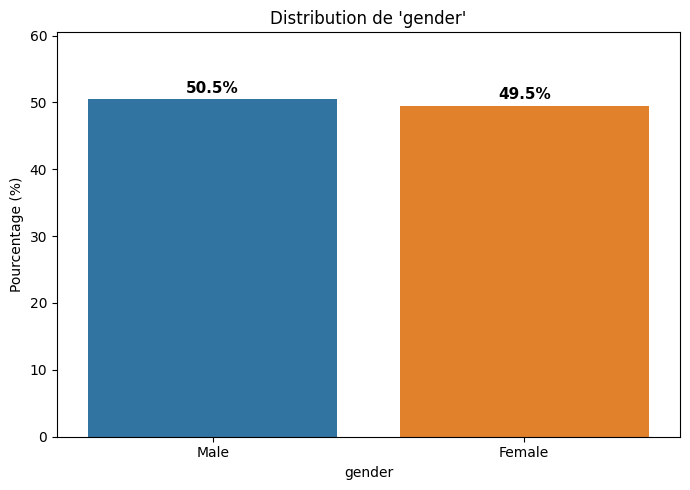

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


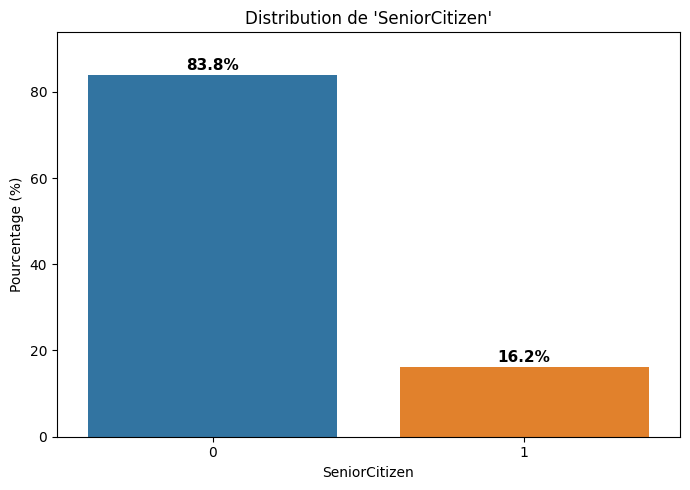

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


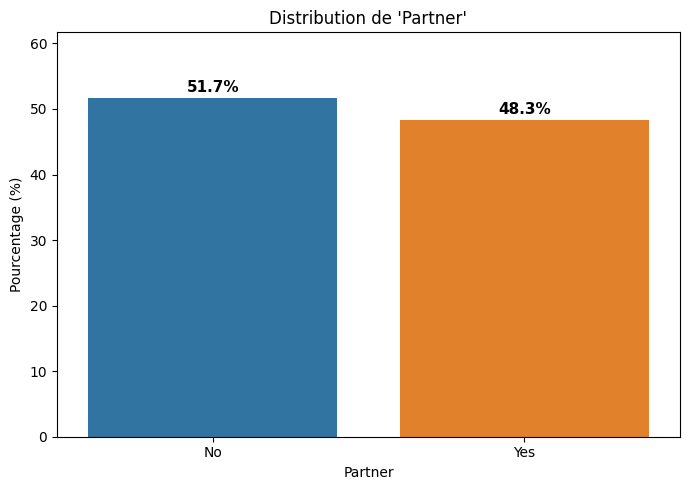

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


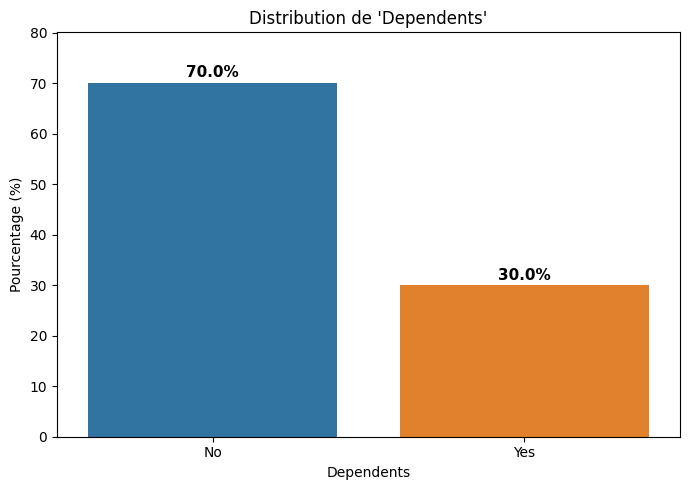

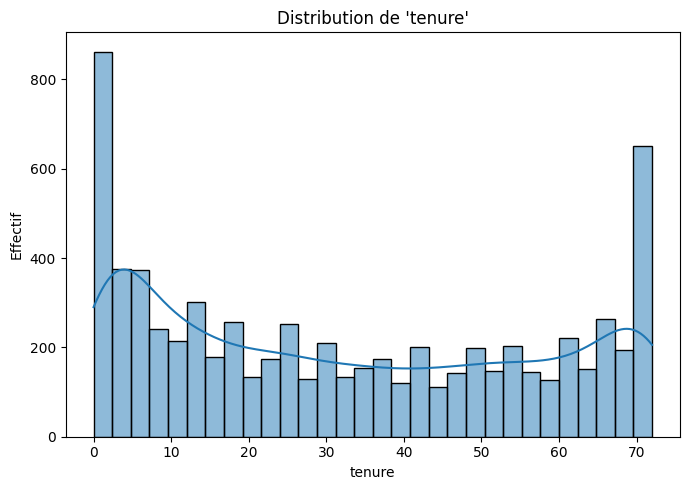

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


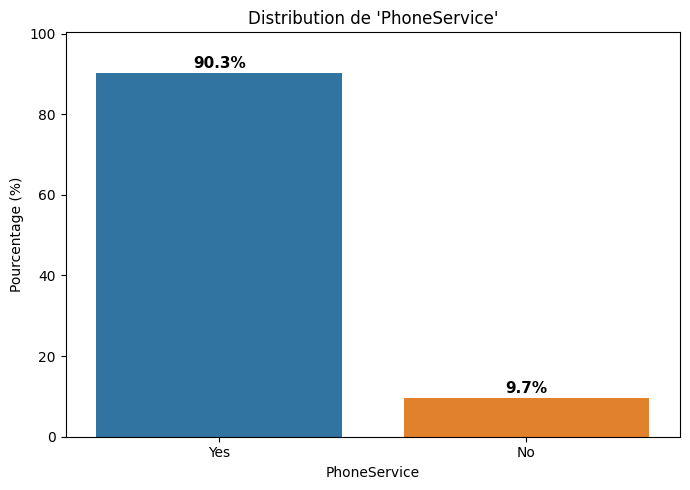

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


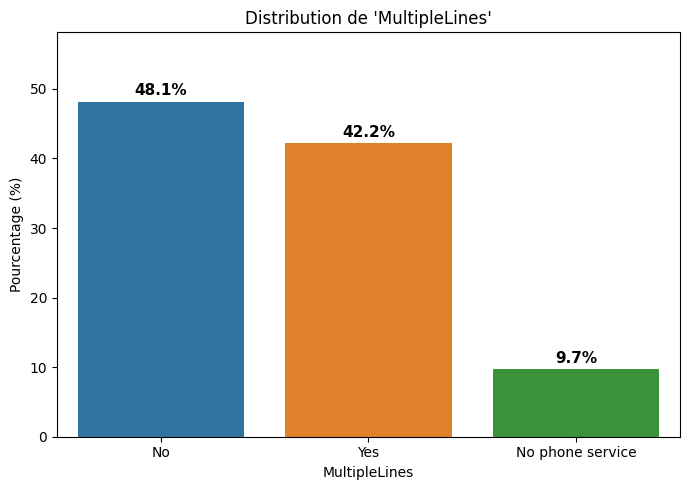

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


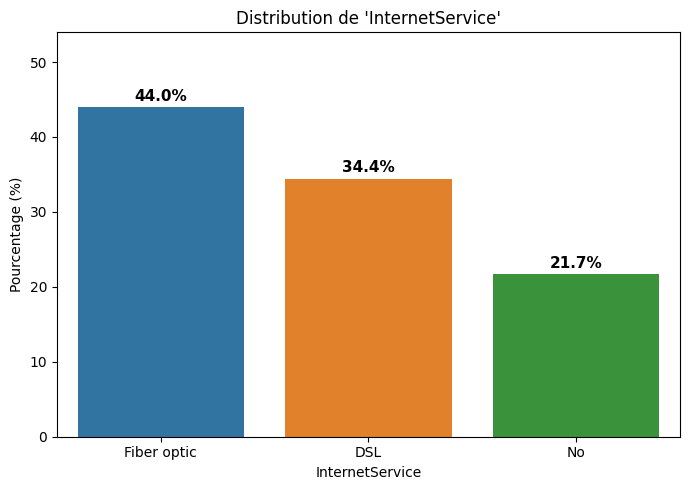

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


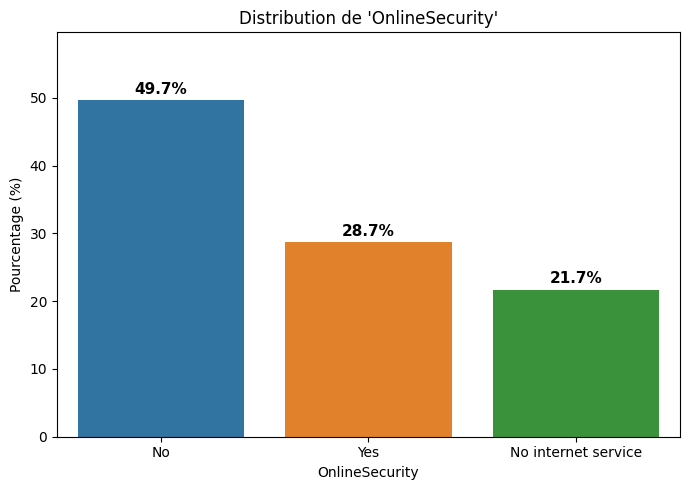

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


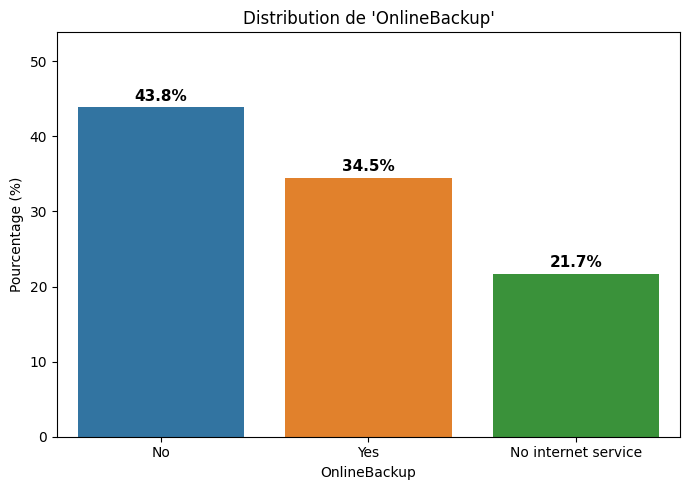

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


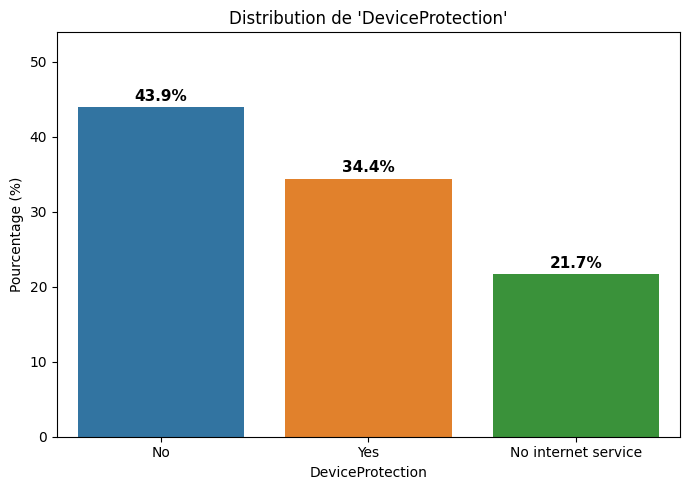

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


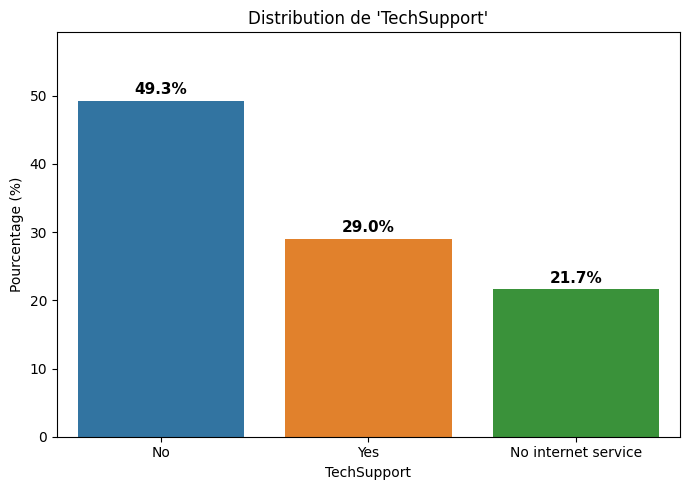

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


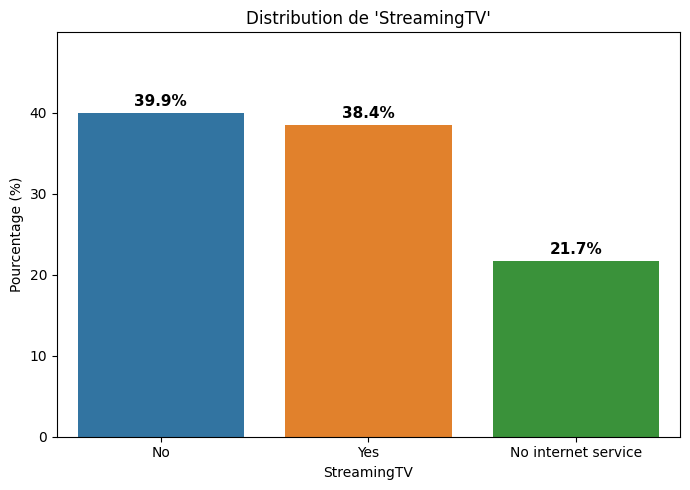

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


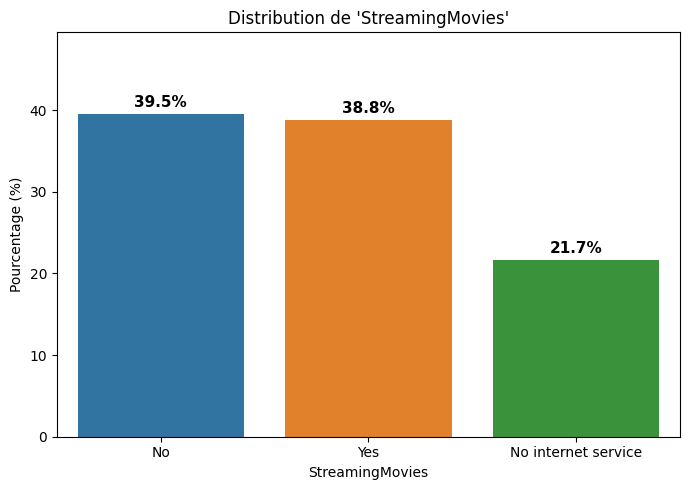

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


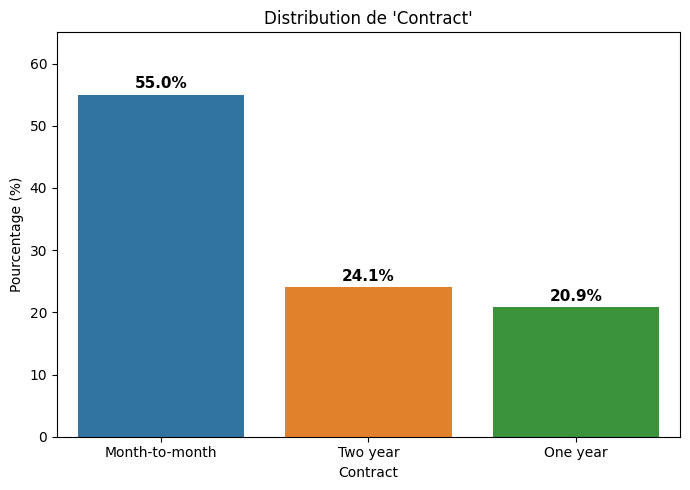

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


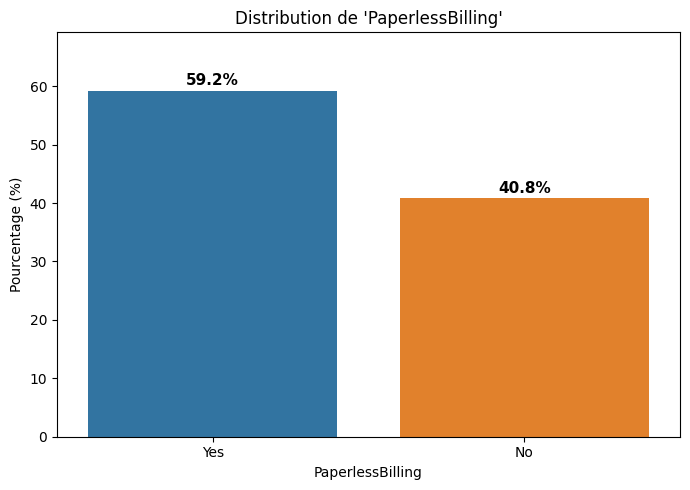

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


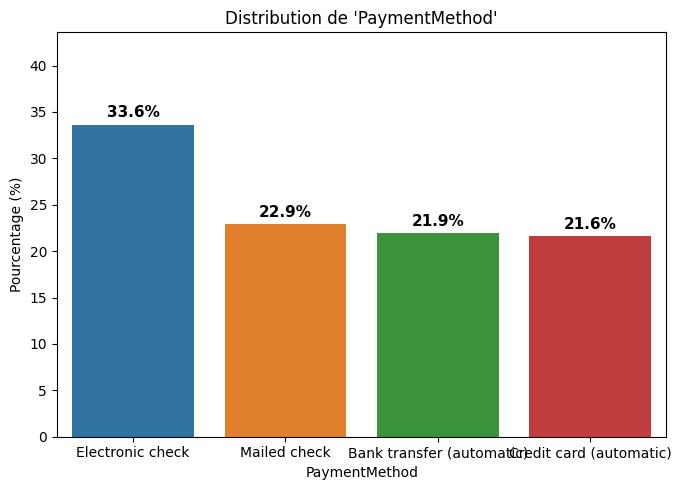

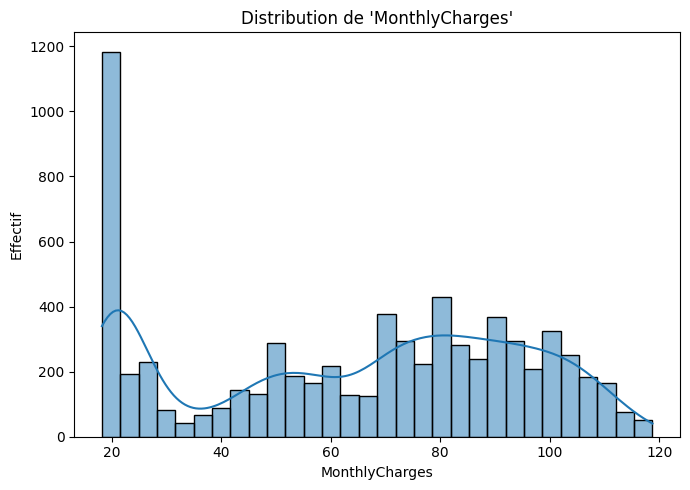

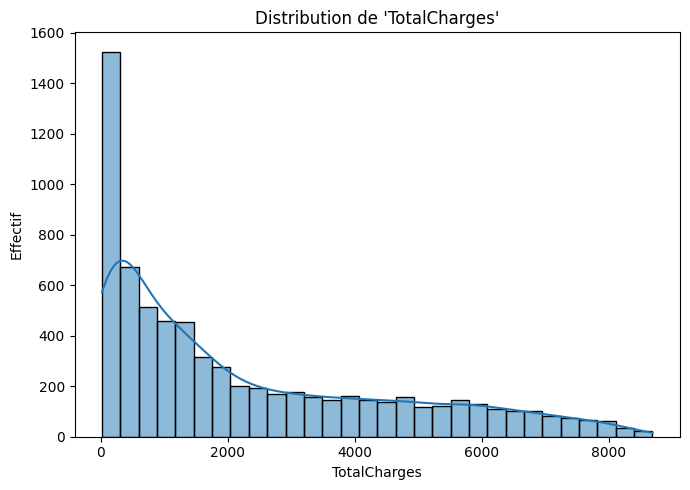

C:\Users\akade\AppData\Local\Temp\ipykernel_23408\2158517587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percentages, x=col, y="pct", palette=palette, ax=ax)


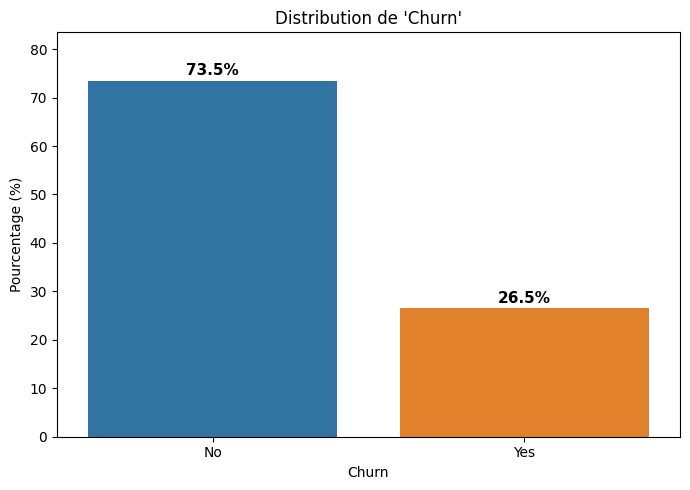

In [19]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object") 
df["TotalCharges"] = df["TotalCharges"].replace(' ', None)
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df_without_id = df.drop(columns=["customerID"])
plot_univarie(df_without_id)

# Analyse bivariée

## étude de corrélation

Construction d'une matrice de V de cramer

In [21]:
def plot_matrice_v_cramer(df):        
    # Détection automatique des variables qualitatives
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Création du tableau de contingence pour chaque paire de variables
    contingency_tables = {}
    for var1 in categorical_vars:
        for var2 in categorical_vars:
            contingency_table = pd.crosstab(df[var1], df[var2])
            contingency_tables[(var1, var2)] = contingency_table

    # Calcul dy V de Cramer pour chaque paire de variables
    cramer_v_values = {}
    for (var1, var2), contingency_table in contingency_tables.items():
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim))
        cramer_v_values[(var1, var2)] = cramers_v

    #DataFrame pour stocker les valeurs du V de Cramer
    cramer_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
    for var1 in categorical_vars:
        for var2 in categorical_vars:
            cramer_df.loc[var1, var2] = cramer_v_values.get((var1, var2), cramer_v_values.get((var2, var1)))

    # Conversion en float
    cramer_df = cramer_df.astype(float)

    #Heatmap avec seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(cramer_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("V de Cramer Heatmap")
    plt.show()

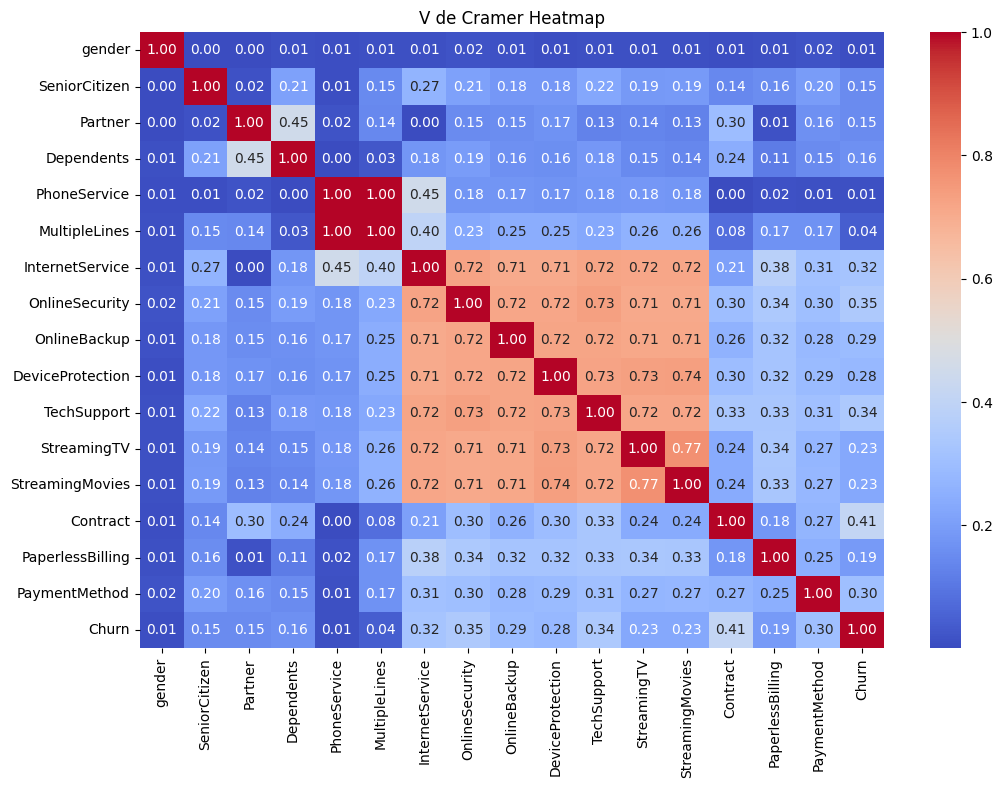

In [22]:
plot_matrice_v_cramer(df_without_id)

Suite à la matrice je décide de conserver les variables suivantes : senior citizen,dependents, MultipleLines,contract, PaymentMethod comme les variables internetservice à streaming movies sont corrélé je vais en créer une nouvelle qui est la combinaison de toutes ces variables. Ce sera score d'engagement

Boxplot pour croiser les variables quantitatives et la variable cible

<Axes: xlabel='Churn', ylabel='TotalCharges'>

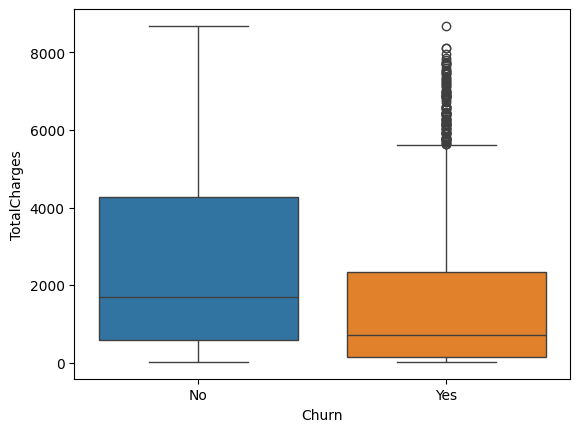

In [24]:
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges', hue = 'Churn')

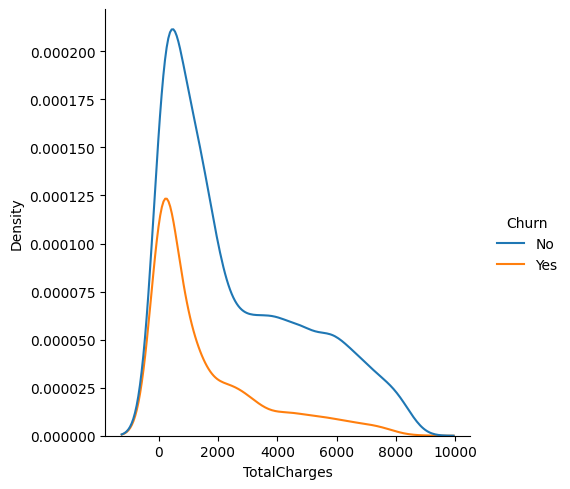

In [ ]:
sns.displot(df,x = 'TotalCharges', hue = 'Churn', kind= 'kde')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

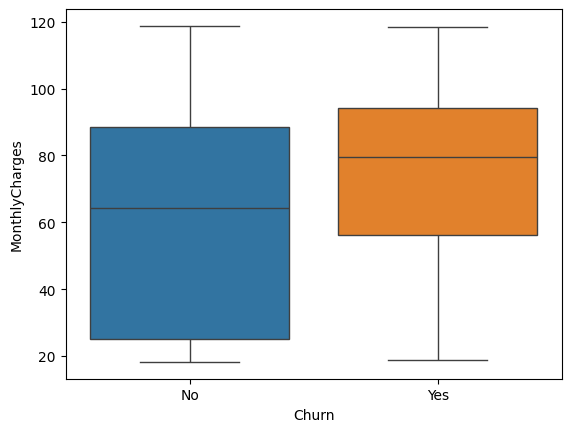

In [25]:
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges', hue = 'Churn')

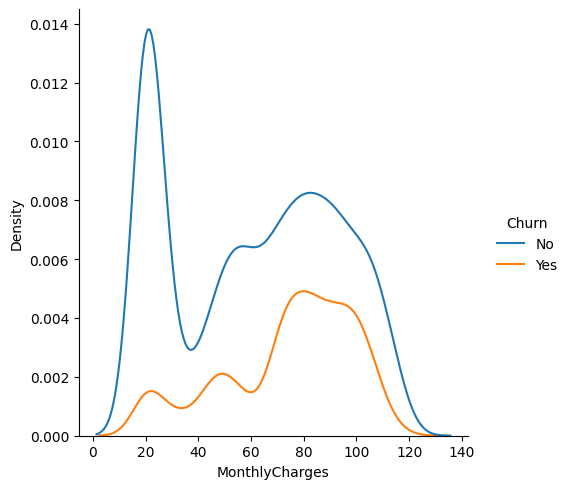

In [ ]:
sns.displot(df,x = 'MonthlyCharges', hue = 'Churn', kind= 'kde')